In [354]:
ITERATIONS = 20
import numpy as np

### Define Function f(x)

In [355]:
def f(x):
    return -(x**5)+5*(x**3)+20*x-5

---
### Some methods

In [356]:
### Initialize Position List
def Initialize_Position(List):
    return List

### Initialize Velocities
def Initialize_Velocities():
    return [0, 0, 0, 0]

### Get Local Best Position
def Get_Local_Best_Position(List, Current_Local_Best_Position):
    for i in range(4):
        if( f(List[i]) > f(Current_Local_Best_Position[i])):
            Current_Local_Best_Position[i] = List[i]
    return Current_Local_Best_Position

### Get Global Best Position
def Get_Global_Best_Position(List, Global_Best_Position):
    for i in range(4):
        if( f(List[i]) > Global_Best_Position):
            Global_Best_Position = List[i]
    return Global_Best_Position

### Get Velocities of Particles
def Get_Velocities_of_Particles(Local_Best_Position,
                                Global_Best_Position,
                                Current_Velocities,
                                Current_Position):
    New_Velocities = Initialize_Velocities() # ?
    w = c_1 = c_2 = 1
    r_1 = np.random.uniform(0, 1, 1)
    r_2 = np.random.uniform(0, 1, 1)

    for i in range(4):
        New_Velocities[i] = w*Current_Velocities[i]\
                            + c_1*r_1*(Local_Best_Position[i]-Current_Position[i])\
                            + c_2*r_2*(Global_Best_Position-Current_Position[i])
        New_Velocities[i] = float(New_Velocities[i])
    return New_Velocities

def Get_New_Positions(Velocities, Current_Position):
    New_Positions = Current_Position
    for i in range(4):
        New_Positions[i] = Velocities[i] + Current_Position[i]
    return New_Positions


## Let's Start

### Initialization

In [357]:
#x_1 = -2; x_2 = 0; x_3 = 1; x_4 = 3
#print(x_1)
#print(x_4)

# Set Initial Positions
x = [-2, 0, 1, 3]
print(x)

# Set weights vector
wcc = [1, 1, 1] # c_1 = c_2 = w = 1

Current_Position = Initialize_Position(x)
Current_Velocities = Initialize_Velocities()

# Initialize Local Best Position
Local_Best_Position = Current_Position

# Initialize Global Best Position
Global_Best_Position = Current_Position[0]
### Arbitrarily set a position as Global Best Position from Current_Position

# Claim a list to store historical positions, for plotting.
History_Position = []

[-2, 0, 1, 3]


In [358]:
for i in range(ITERATIONS):
    Local_Best_Position = Get_Local_Best_Position(Current_Position, Local_Best_Position)
    Global_Best_Position = Get_Global_Best_Position(Current_Position, Global_Best_Position)
    New_Velocities = Get_Velocities_of_Particles(Local_Best_Position,
                                                Global_Best_Position,
                                                Current_Velocities,
                                                Current_Position)
    Current_Position = Get_New_Positions(New_Velocities, Current_Position)
    print(f'Current Position: \n {Current_Position}')
    #print(np.array(Current_Position).shape)
    #History_Position.append(Current_Position)
    History_Position = np.concatenate((History_Position, Current_Position), axis=0)
    #print(f'History Position: \n {History_Position}\n')

Current Position: 
 [-1.9153136472897603, 0.028228784236746574, 1.0, 2.943542431526507]
Current Position: 
 [0.7410716876330414, 0.9136905625443471, 1.0, 1.1726188749113058]
Current Position: 
 [0.8640567380781724, 0.9874815928114257, 1.0491940201780523, 1.1726188749113058]
Current Position: 
 [1.163430877404302, 1.1671060764071035, 1.1689436759085043, 1.1726188749113058]
Current Position: 
 [1.166887680484464, 1.1691801582552006, 1.170326397140569, 1.1726188749113058]
Current Position: 
 [1.171090265200603, 1.1717017090848842, 1.1720074310270248, 1.1726188749113058]
Current Position: 
 [1.1722074779547178, 1.1723720367373531, 1.1724543161286707, 1.1726188749113058]
Current Position: 
 [1.1725697636381949, 1.1725894081474393, 1.1725992304020614, 1.1726188749113058]
Current Position: 
 [1.1725866266118965, 1.1725995259316602, 1.1726059755915421, 1.1726188749113058]
Current Position: 
 [1.1726109334142594, 1.1726141100130778, 1.1726156983124871, 1.1726188749113058]
Current Position: 
 [1

### Plot the Movement of Particles

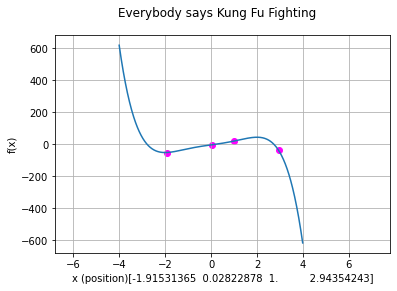

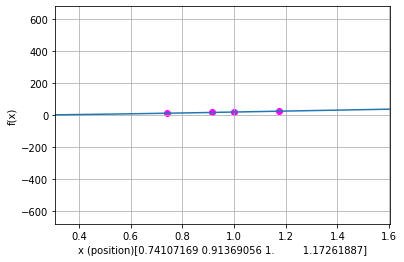

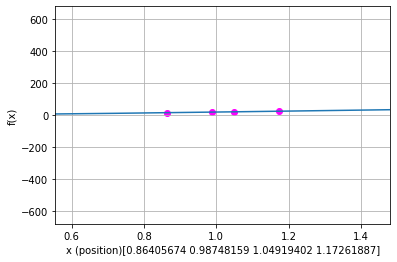

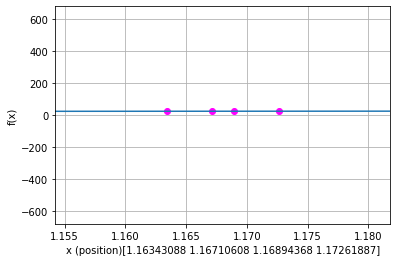

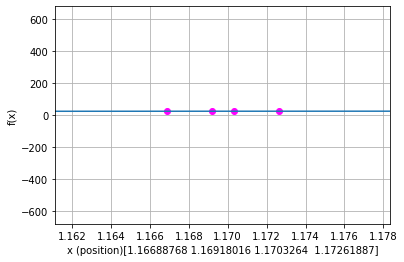

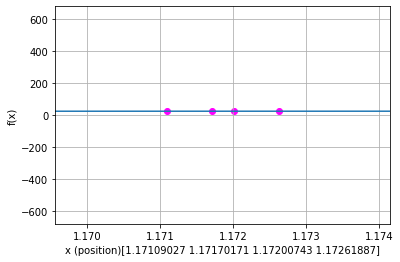

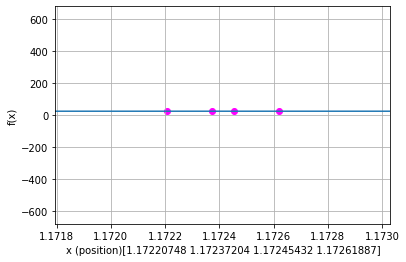

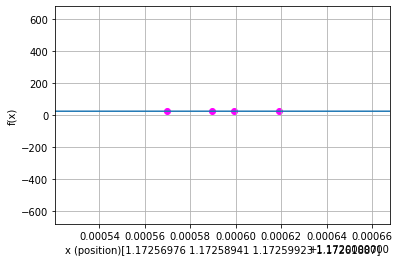

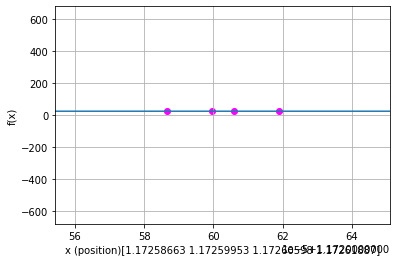

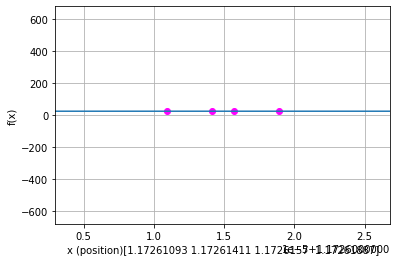

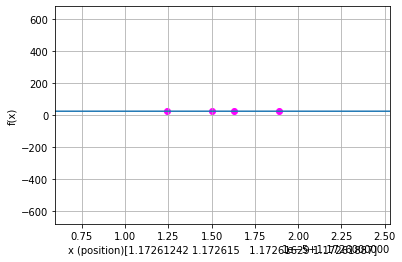

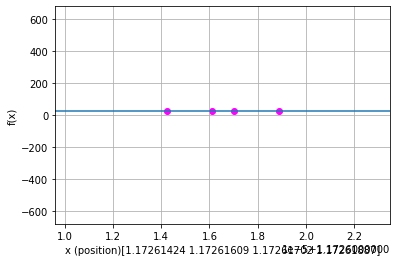

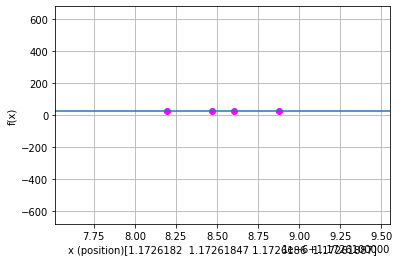

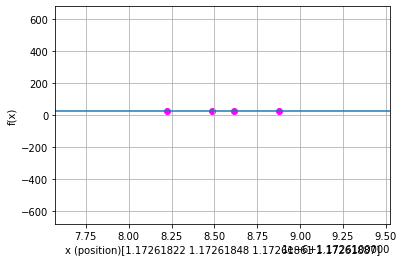

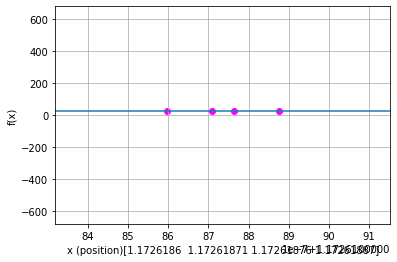

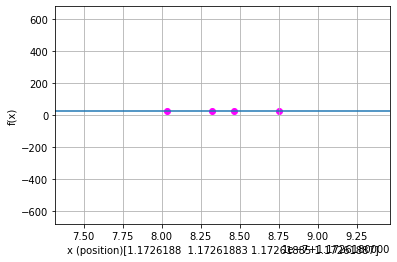

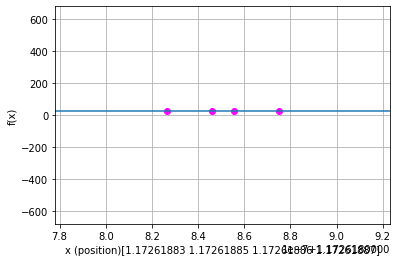

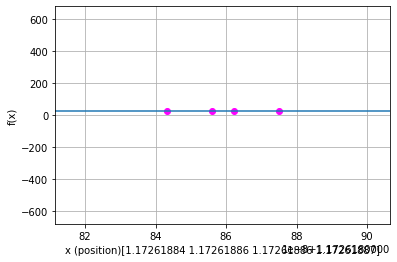

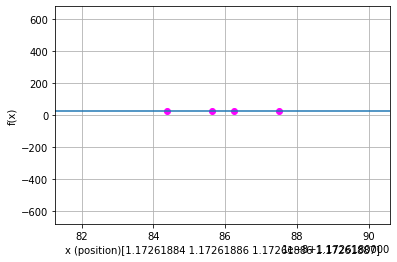

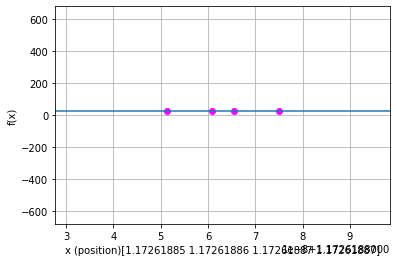

In [359]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plt.ion()

for index in range(ITERATIONS):
    fig.clf()
    fig.suptitle("Everybody says Kung Fu Fighting")

    x = np.arange(-4, 4, 0.01)
    function = -(x**5)+5*(x**3)+20*x-5
    particles_location_x = History_Position[index*4:index*4+4]
    particles_location_y = f(History_Position[index*4:index*4+4])

    plt.scatter(particles_location_x,particles_location_y,c='magenta')

    plt.xlabel(f"x (position){particles_location_x}")
    plt.ylabel("f(x)")

    LB = 2*min(History_Position[index*4:index*4+4])\
             -max(History_Position[index*4:index*4+4])
    UB = 2*max(History_Position[index*4:index*4+4])\
            -min(History_Position[index*4:index*4+4])

    plt.xlim(LB, UB)
    plt.plot(x, function)
    plt.grid()

    plt.pause(0.2)

plt.ioff()

plt.show()
